<a href="https://colab.research.google.com/github/brunnabrito/projeto_m4_g4_resilia/blob/brunna/Projeto_M4_Grupo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='green' style='font-size: 30px;'>Projeto de encerramento do módulo 4: Pandas notebook</font>
<hr style='border: 2px solid red;'>

## **1. O Grupo**

Grupo 4

* Brunna Brito
* Gabriel Kanarski
* Lucas Faria
* Samyr Ozibel
* Vinícius Costa Souto

## **2. Descrição do Projeto**

Você e a sua equipe foram escalados pela Agência Nacional de Petróleo e Gás Natural e Biocombustíveis (ANP) para realizar uma análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol. ANP é um centro de referência em dados e informações sobre a indústria de petróleo e gás natural:

mantém o Banco de Dados de Exploração e Produção (BDEP);
promove estudos sobre o potencial petrolífero e o desenvolvimento do setor;
recebe e torna públicas as notificações de descobertas;
divulga as estatísticas oficiais sobre reservas, refino e produção de petróleo, gás e biocombustíveis no Brasil.
A ANP também realiza e divulga rotineiramente pesquisas sobre qualidade dos combustíveis e lubrificantes e sobre o comportamento dos preços desses produtos. Consolida e divulga informações sobre os mercados regulados e acerca dos investimentos em pesquisa, inovação e formação profissional voltadas para os setores regulados. As fontes de dados que serão utilizadas no projeto estão disponíveis no portal dados.gov. Serão utilizados os arquivos dos meses de junho e julho de 2021 contendo a série histórica dos preços da gasolina e do etanol em todo o Brasil. Para baixar os arquivos, basta clicar nos meses que estão destacados anteriormente.

As perguntas a serem respondidas são:

1) Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?

2) Qual o preço médio da gasolina e do etanol nesses dois meses?

3) Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

4) Qual o preço médio da gasolina e do etanol por estado?

5) Qual o município que possui o menor preço para a gasolina e para o etanol?

6) Qual o município que possui o maior preço para a gasolina e para o etanol?

7) Qual a região que possui o maior valor médio da gasolina?

8) Qual a região que possui o menor valor médio do etanol?

9) Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

10) Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

O projeto deverá obrigatoriamente:

Utilizar Jupyter Notebook ou Colab;
Realizar a limpeza dos dados;
Realizar análise exploratória;
O notebook utilizado na análise deve estar organizado, com descrições do passo a passo da análise em markdown, apresentação dos resultados e insights gerados;
Levantar mais duas perguntas e respondê-las da forma que achar mais adequada.

## **3. Entendendo os Dados**

Nesta etapa estaremos coletando os dados iniciais, descrevendo os referidos dados, bem como explorando os dados com as estatísticas descritivas e por fim, verificando a qualidade de dados.

##### 3.1 Importando as bibliotecas

**Eixo base**

1. NumPy

Biblioteca de manipulação de arrays multidimensionais de alta performance, possui diversas funções matemáticas e estatísticas.

2. Pandas

Principal biblioteca de manipulação e análise de dados. Possui diversos métodos para agrupar, filtrar, manipular, limpar e combinar dados de forma simples.
<br>
<br>
<br>
**Data Visualization**

1. Matplotlib

O matplotlib é uma biblioteca com recursos para a geração de gráficos 2D a partir de arrays. 

2. Seaborn

O Seaborn é uma biblioteca de visualização de dados do Python baseado no Matplotlib. Ele provê uma interface de alto nível para construção de gráficos estatísticos atrativos e informativos.

In [55]:
# Carregando os pacotes do Python necessários 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### 3.2 Coletando os dados iniciais

Carregar os arquivos dispíveis na ANP

In [2]:
# Carregando os dados do mês de junho com informações fornecidas pela ANP
jun = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-06-gasolina-etanol.csv", delimiter = ";")
jun.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA ADITIVADA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,ETANOL,01/06/2021,"6,1",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GASOLINA,01/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,BRANCA


In [3]:
# Carregando os dados do mês de julho com informações fornecidas pela ANP
jul = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv", delimiter = ";")
jul.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,GASOLINA,01/07/2021,"5,499",NaN,R$ / litro,IPIRANGA
1,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,ETANOL,01/07/2021,"5,2",NaN,R$ / litro,IPIRANGA
2,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,GASOLINA ADITIVADA,01/07/2021,"5,699",NaN,R$ / litro,IPIRANGA
3,NE,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,03.602.329/0001-10,ESTRADA FORTALEZA MARANGUAPE,S/N,NaN,KAGADO,61901-410,GASOLINA,01/07/2021,"5,49",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,NE,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,03.602.329/0001-10,ESTRADA FORTALEZA MARANGUAPE,S/N,NaN,KAGADO,61901-410,ETANOL,01/07/2021,"4,99",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


##### 3.3 Unindo os dados

Para facilitar a manipulação dos dados optamos por unir os datasets originais em um só, como ambos possuem os mesmos dados e tipos nas colunas usaremos a concatenação para fazer essa união

In [25]:
df = pd.concat([jun, jul], ignore_index=True)

##### **3.4 Descrevendo os dados**

Nessa etapa os dados são descritos com objetivo de conhecermos seu formato, os tipos de variáveis (numéricas ou categóricas), bem como aspectos gerais úteis ao entendimento geral do problema.

In [5]:
# Conhecendo o formato do dataset.

df.shape

(97586, 16)

Em uma análise inicial percebe-se que o dataset apresenta um total de 97586 linhas, entradas ou observações, bem como um total de 16 colunas

In [6]:
# Conhecendo as varíaveis e seus tipos.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97586 entries, 0 to 97585
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Região - Sigla     97586 non-null  object 
 1   Estado - Sigla     97586 non-null  object 
 2   Município          97586 non-null  object 
 3   Revenda            97586 non-null  object 
 4   CNPJ da Revenda    97586 non-null  object 
 5   Nome da Rua        97586 non-null  object 
 6   Número Rua         97529 non-null  object 
 7   Complemento        19711 non-null  object 
 8   Bairro             97327 non-null  object 
 9   Cep                97586 non-null  object 
 10  Produto            97586 non-null  object 
 11  Data da Coleta     97586 non-null  object 
 12  Valor de Venda     97586 non-null  object 
 13  Valor de Compra    0 non-null      float64
 14  Unidade de Medida  97586 non-null  object 
 15  Bandeira           97586 non-null  object 
dtypes: float64(1), object(

**Dicionário das variáveis**

* `Região - Sigla` - xxxxxxx
* `Estado - Sigla` - xxxxx
* `Município` - xxxxxxx
* `Revenda` - xxxxx
* `CNPJ da Revenda` - xxxxxxx
* `Nome da Rua` - xxxxx
* `Número Rua` - xxxxxxx
* `Complemento` - xxxxx
* `Bairro` - xxxxxxx
* `Cep` - xxxxx
* `Produto` - xxxxxxx
* `Data da Coleta` - xxxxx
* `Valor de Venda` - xxxxxxx
* `Valor de Compra` - xxxxx
* `Unidade de Medida` - xxxxxxx
* `Bandeira` - xxxxx


E por fim, nesta etapa, é interessante visualizarmos a estrutura do nosso dataset com a possibilidade de identificação prematura de dados faltantes, possíveis valores discrepantes, dentre outras questões. 

In [7]:
# Visualizar as 5 primeiras linhas do Dataset.

df.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA ADITIVADA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,ETANOL,01/06/2021,"6,1",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GASOLINA,01/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,BRANCA


In [8]:
# Visualizar as 5 últimas linhas do Dataset.

df.tail()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
97581,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,GASOLINA ADITIVADA,26/07/2021,"5,87",NaN,R$ / litro,BRANCA
97582,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,ETANOL,26/07/2021,"4,99",NaN,R$ / litro,BRANCA
97583,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,GASOLINA,26/07/2021,"5,87",NaN,R$ / litro,BRANCA
97584,SE,MG,ARAXA,AUTO POSTO BRANQUINHO LTDA,37.461.683/0001-94,AVENIDA SENADOR MONTANDON,950,NaN,CENTRO,38183-214,ETANOL,28/07/2021,"4,599",NaN,R$ / litro,RIO BRANCO
97585,SE,MG,ARAXA,AUTO POSTO BRANQUINHO LTDA,37.461.683/0001-94,AVENIDA SENADOR MONTANDON,950,NaN,CENTRO,38183-214,GASOLINA,28/07/2021,"6,199",NaN,R$ / litro,RIO BRANCO


## **4. Preparação e limpeza dos dados:** 

Nesta etapa estaremos limpando os dados, integrando os dados, formatando os dados, construindo novos dados, para enfim, selecionar os dados que serão utilizados na construção de nosso modelo (análise exploratória de dados).

##### **4.1 Selecionando os dados**

Verificamos que temos alguns dados que não serão determinantes na nossa análise e optamos por retirá-los para termos mais clareza durante a análise. 

In [26]:
# Selecionando as colunas necessárias para a análise e renomeando colunas para facilitar o acesso aos dados

df = df[['Região - Sigla', 'Estado - Sigla', 'Município', 'Produto', 'Valor de Venda', 'Data da Coleta','Bandeira']]
df = df.rename(columns={'Região - Sigla': 'Regiao', 'Estado - Sigla': 'Estado', 'Município':'Municipio', 'Valor de Venda': 'Valor', 'Data da Coleta':'Data'})

##### **4.2 Integração dos Dados**

Conforme exposto em aula a análise poderia ser feita unindo os dois tipos de gasolina, gasolina comum e gasolina aditivada. Aqui faremos a transformação da gasolina aditivada para simplesmente gasolina. 

In [27]:
# Verificando onde o produto é 'GASOLINA ADITIVADA' e convertendo para 'GASOLINA'

df['Produto'][df['Produto'].str.contains('GASOLINA ADITIVADA')] = 'GASOLINA'

##### **4.3 Convertendo os valores**

Identificamos que a coluna valor trata-se de uma variável numérica e vamos converter o valor para float com a substituição da ',' pelo '.'.

In [28]:
df['Valor'] = df['Valor'].apply(lambda x: float(x.replace(',', '.')))
df

,Regiao,Estado,Municipio,Produto,Valor,Data,Bandeira
0,N,AC,CRUZEIRO DO SUL,GASOLINA,6.890,02/06/2021,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,CRUZEIRO DO SUL,GASOLINA,6.890,02/06/2021,PETROBRAS DISTRIBUIDORA S.A.
2,N,AC,CRUZEIRO DO SUL,ETANOL,6.100,01/06/2021,PETROBRAS DISTRIBUIDORA S.A.
3,N,AC,CRUZEIRO DO SUL,GASOLINA,6.890,01/06/2021,PETROBRAS DISTRIBUIDORA S.A.
4,N,AC,CRUZEIRO DO SUL,GASOLINA,6.890,02/06/2021,BRANCA
...,...,...,...,...,...,...,...
97581,SE,ES,ARACRUZ,GASOLINA,5.870,26/07/2021,BRANCA
97582,SE,ES,ARACRUZ,ETANOL,4.990,26/07/2021,BRANCA
97583,SE,ES,ARACRUZ,GASOLINA,5.870,26/07/2021,BRANCA
97584,SE,MG,ARAXA,ETANOL,4.599,28/07/2021,RIO BRANCO


### **4.4 Estatísticas Descritivas**

Agora que já conhecemos a estrutura de nossos dados, passamos para etapa de identificação da qualidade de nossos dados, por meio da aplicação de técnicas de estatística descritiva, com especial atenção para identificação de valores faltantes, presença de outliers, análise de correlações entre as variáveis, dentre outras questões relevantes nesta fase inicial.

Verificar a quantidade de missing em cada coluna após a transformação

In [29]:
# Cálculo do percentual de dados faltantes no Dataset.

df.isna().sum()

Regiao       0
Estado       0
Municipio    0
Produto      0
Valor        0
Data         0
Bandeira     0
dtype: int64

* Não existem valores nulos para serem removidos ou tratados

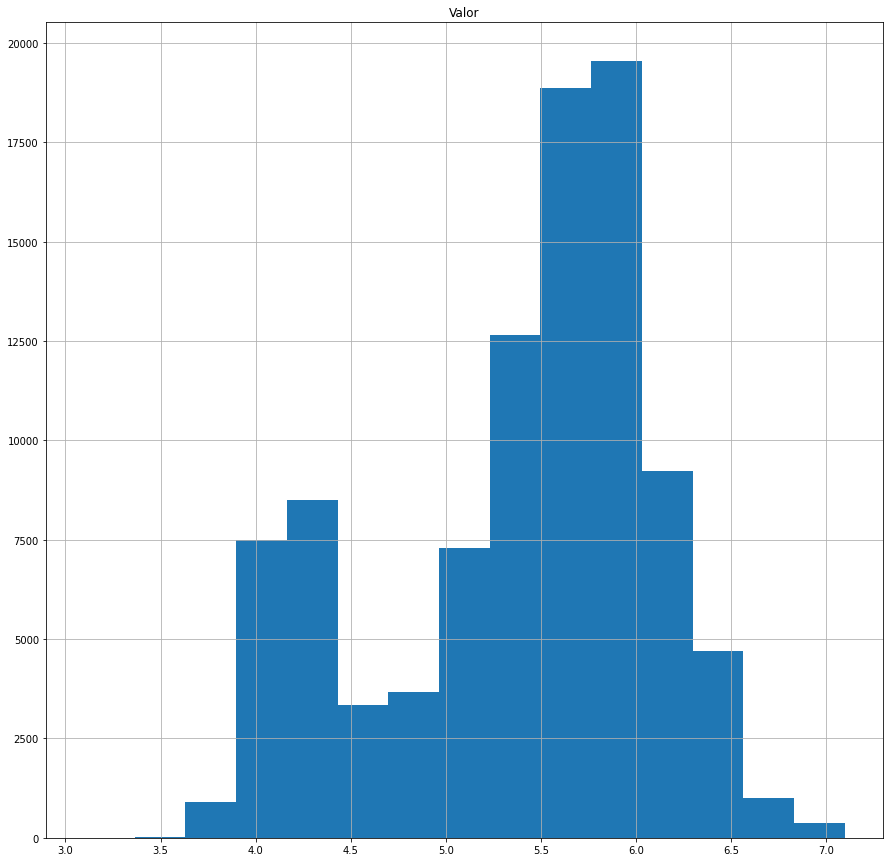

In [30]:
# Contrução dos histogramas das variáveis do dataset.

df.hist(bins=15, figsize=(15,15));

**Quanto a distribuição do histograma podemos verificar que:**

* dsjfdsf **`Valor`** kjsljsdl;lf
* dfshdjfksdklf

In [39]:
# Construindo os resumos estatísticos das variáveis numéricas usando a função describe.

df.describe()

,Valor
count,97586.000000
mean,5.384929
std,0.715136
min,3.097000
25%,4.990000
50%,5.550000
75%,5.899000
max,7.097000


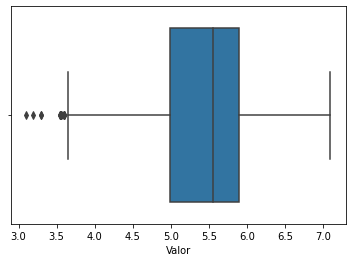

In [73]:
sns.boxplot(data = df, x= 'Valor')

**Quanto ao resumo das estatísticas, das variáveis numéricas do dataset, podemos verificar que:**

* ksdjkfsdjkfl
* kdsldjsklf

### **4.5 Correlação dos Dados**

Nesta etapa vamos selecionar quais colunas, variáveis ou features serão selecionadas para comporem o nosso modelo de DS considerando suas importâncias no conjunto de dados. Vamos utilizar uma técnica de correlação estatística sobre as variáveis numéricas.

In [40]:
df.corr()

,Valor
Valor,1.0


## **5. Análise exploratória** 

Problemas Investigados


#### ***01: Brunna***

1) Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?

In [162]:
etanol = df.query('Produto == "ETANOL"')
gasolina = df.query('Produto == "GASOLINA"')

evolucao_precos_etanol = etanol.groupby('Data')['Valor'].mean()
evolucao_precos_gasolina = gasolina.groupby('Data')['Valor'].mean()

# deu erro com a data aqui, ver como corrigir

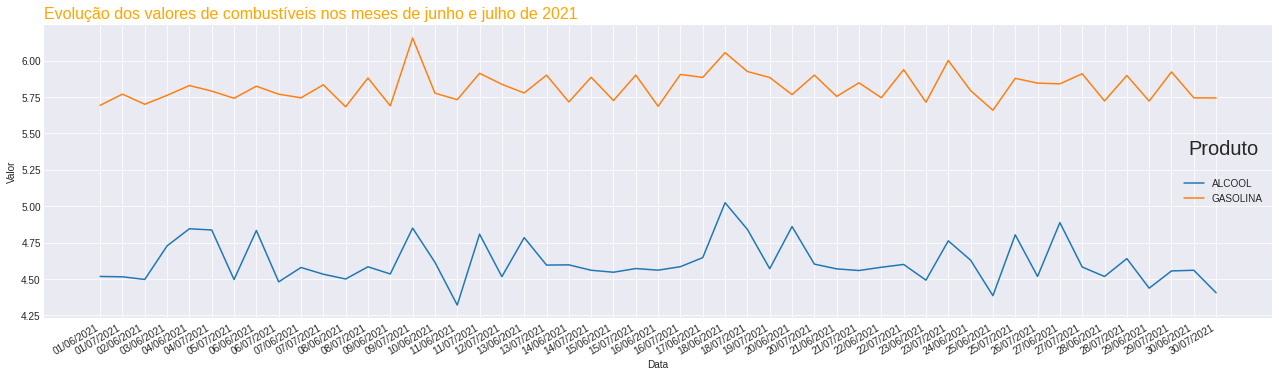

In [164]:
fig, ax = plt.subplots(figsize=(22, 6))

# rotacionar das datas
fig.autofmt_xdate()

# Adiconando títulos
plt.title("Evolução dos valores de combustíveis nos meses de junho e julho de 2021", loc='left', fontsize=16, fontweight=0, color='orange')
plt.xlabel("Data")
plt.ylabel("Valor")

# Mostrando a evolução
plt.plot(evolucao_precos_etanol)
plt.plot(evolucao_precos_gasolina)

#Adicionando legenda
legend = plt.legend(['ALCOOL','GASOLINA'], title = "Produto", title_fontsize = 20)
legend._legend_box.sep = 20

2) Qual o preço médio da gasolina e do etanol nesses dois meses?

In [165]:
df.groupby('Produto')['Valor'].describe()

,count,mean,std,min,25%,50%,75%,max
Produto,,,,,,,,
ETANOL,33096.0,4.581825,0.533944,3.097,4.159,4.399,4.997,6.999
GASOLINA,64490.0,5.797078,0.355950,4.199,5.520,5.790,5.999,7.097


**Quanto às questões ligadas ao valor médio dos combustíveis, podemos verificar que:**

* O valor médio do **etanol** nos meses de junho e julho de 2021 fica em torno de **4,581 reais**, com desvio padrão de **0,533**, mediana de **4,399 reais**, com valores máximos chegando a **6,999 reais**. Cabendo ressaltar que 75% dos preços estão abaixo do valor de **4,997** reais.

* O valor médio da **gasolina** nos meses de junho e julho de 2021 fica em torno de **5,797 reais**, com desvio padrão de **0,355**, mediana de **5,790 reais**, com valores máximos chegando a **7,097 reais**. Cabendo ressaltar que 75% dos preços estão abaixo do valor de **5,999** reais.

* Comparando os dois combustíveis verificamos que o etanol sofre maior oscilação de valores do que a gasolina que teve seu valor mais estável.

3) Sugestão de pergunta

#### ***02: Gabriel***

3) Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

4) Qual o preço médio da gasolina e do etanol por estado?

#### ***03: Lucas***

5) Qual o município que possui o menor preço para a gasolina e para o etanol?

6) Qual o município que possui o maior preço para a gasolina e para o etanol?

#### ***04: Samyr***

7) Qual a região que possui o maior valor médio da gasolina?

8) Qual a região que possui o menor valor médio do etanol?

#### ***05: Vinicius***

9) Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

In [18]:
df_group_reg = df.groupby('Regiao')
data_1 = df_group_reg['Valor'].mean().round(2)
data_1

Regiao
CO    5.35
N     5.69
NE    5.63
S     5.53
SE    5.22
Name: Valor, dtype: float64

In [ ]:
data_2 = round(df['Valor'].mean(), 2)
data_2

In [ ]:
plt.scatter(ser, data_1)
plt.title('Gráfico de Dispersão entre data1 e data2')
plt.show()

In [ ]:
df_group_band = df.groupby('Bandeira')
df_group_band['Valor'].describe().round(2)

10) Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

## **6. Conclusões**

djfsljdfklajdsklsj;fdljksadl

**Resultados:**


* jldshsjdflkdsj;f
* kldjskljdlka;dskfj;s
* dksljkldsj;ld